In [1]:
%load_ext autoreload
%autoreload 2

In [15]:
from os.path import join
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

from utils.io import load_json
from utils.visualize import set_latex_fonts

In [3]:
# set_latex_fonts(show_sample=True)

### Load data file

In [4]:
data_root = "/ssd/pbagad/datasets/MSR-VTT/"

data_file = join(data_root, "MSRVTT/annotation/MSR_VTT.json")

In [5]:
data = load_json(data_file)

In [6]:
len(data)

5

In [7]:
data.keys()

dict_keys(['info', 'images', 'licenses', 'type', 'annotations'])

In [8]:
data["type"], len(data["images"]), len(data["annotations"])

('captions', 10000, 199994)

In [9]:
data["annotations"][1]

{'caption': 'a cartoon character runs around inside of a video game',
 'id': 1,
 'image_id': 'video2960'}

### Check annotations for a single video

In [10]:
video_id = "video2960"

# find all annotations for this video_id

def find_annotations_for_video(annotations, video_id):
    return [x for x in annotations if x["image_id"] == video_id]

video_annotations = find_annotations_for_video(data["annotations"], video_id)

print(f"Found {len(video_annotations)} captions for video {video_id}.")

Found 20 captions for video video2960.


### Check stats for all videos

In [11]:
# define some temporal prepositions
temporal_prepositions = ["after", "before", "then", "while", "during", "as soon as"]


def check_in_caption(caption, keywords):
    """Checks if any of the given keywords occur in the caption."""
    caption = caption.lower()
    for word in keywords:
        if word.lower() in caption:
            return True
    return False


# find captions with temporal prepositions
temporal_captions = [x for x in data["annotations"] if check_in_caption(
    caption=x["caption"], keywords=temporal_prepositions
)]

print(f"Found captions with temporal prepositions: {len(temporal_captions)}")
print("Some examples:")
print(temporal_captions[:min(3, len(temporal_prepositions))])

Found captions with temporal prepositions: 10838
Some examples:
[{'caption': 'a man gets hit in the face with a chair during a wwf wrestling match', 'id': 20, 'image_id': 'video2636'}, {'caption': 'a man hit another man with a chair in a wrestling ring and then is pinning him', 'id': 22, 'image_id': 'video2636'}, {'caption': 'a man gets hit in the face with a chair during a wwf wrestling match', 'id': 39, 'image_id': 'video2636'}]


In [12]:
temporal_captions_split = defaultdict(list)

for x in temporal_captions:
    for word in temporal_prepositions:
        if word in x["caption"]:
            temporal_captions_split[word].append(x)

In [13]:
len(temporal_captions_split)

6

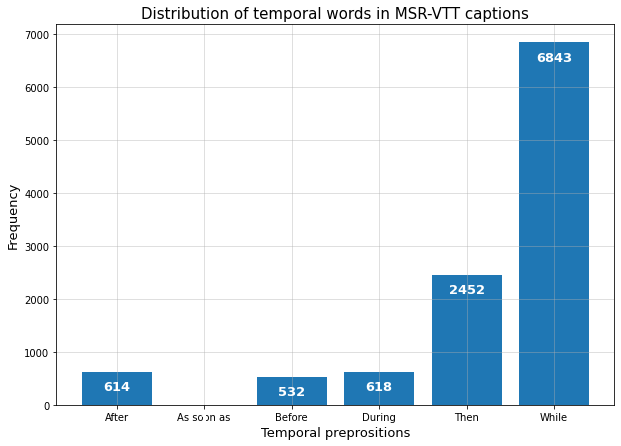

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))

counts = [len(temporal_captions_split[k]) for k in temporal_captions_split]
keys = [k.capitalize() for k in temporal_captions_split]

indices = np.argsort(keys)
counts = np.array(counts)[indices]
keys = np.array(keys)[indices]

ax.grid(alpha=0.5)
ax.bar(keys, counts)
ax.set_title("Distribution of temporal words in MSR-VTT captions", fontsize=15)
ax.set_xlabel("Temporal preprositions", fontsize=13)
ax.set_ylabel("Frequency", fontsize=13)

rects = ax.patches
for rect, count in zip(rects, counts):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height - 400,
        count, ha="center", va="bottom", fontsize=13, color="white", weight='bold',
    )

plt.show()